In [76]:
from google.colab import files
files.upload()

Saving winequality-red.csv to winequality-red (1).csv


{'winequality-red (1).csv': b'"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"\n7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5\n7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5\n7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;9.8;5\n11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58;9.8;6\n7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5\n7.4;0.66;0;1.8;0.075;13;40;0.9978;3.51;0.56;9.4;5\n7.9;0.6;0.06;1.6;0.069;15;59;0.9964;3.3;0.46;9.4;5\n7.3;0.65;0;1.2;0.065;15;21;0.9946;3.39;0.47;10;7\n7.8;0.58;0.02;2;0.073;9;18;0.9968;3.36;0.57;9.5;7\n7.5;0.5;0.36;6.1;0.071;17;102;0.9978;3.35;0.8;10.5;5\n6.7;0.58;0.08;1.8;0.097;15;65;0.9959;3.28;0.54;9.2;5\n7.5;0.5;0.36;6.1;0.071;17;102;0.9978;3.35;0.8;10.5;5\n5.6;0.615;0;1.6;0.089;16;59;0.9943;3.58;0.52;9.9;5\n7.8;0.61;0.29;1.6;0.114;9;29;0.9974;3.26;1.56;9.1;5\n8.9;0.62;0.18;3.8;0.176;52;145;0.9986;3.16;0.88;9.2;5\n8.9;0.62;0.19;3.

In [77]:
import pandas as pd
df = pd.read_csv('/content/winequality-red.csv', sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [78]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


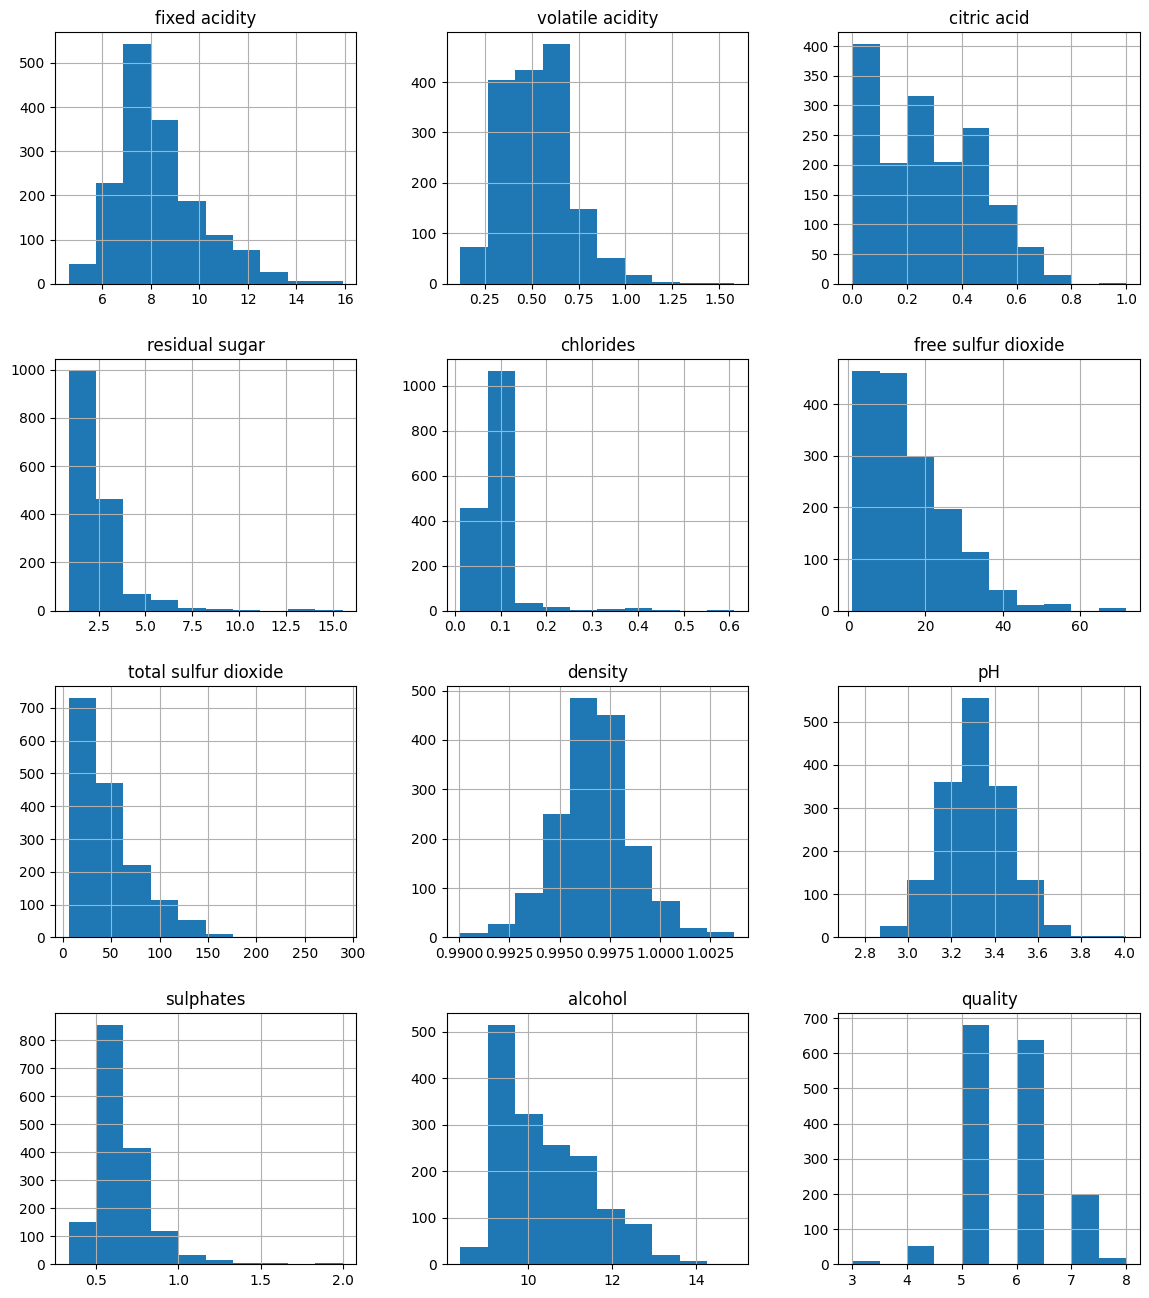

In [79]:
import matplotlib.pyplot as plt
df.hist(figsize=(14,16))
plt.show()

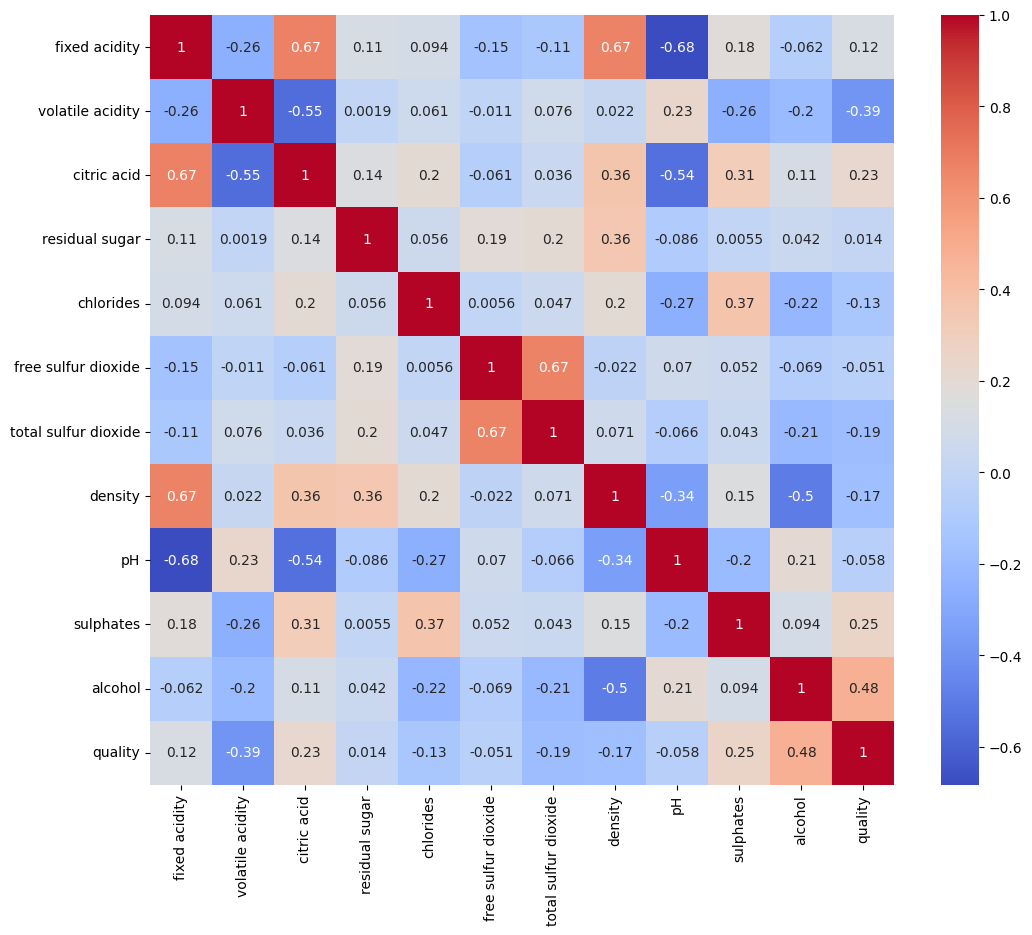

In [80]:
import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

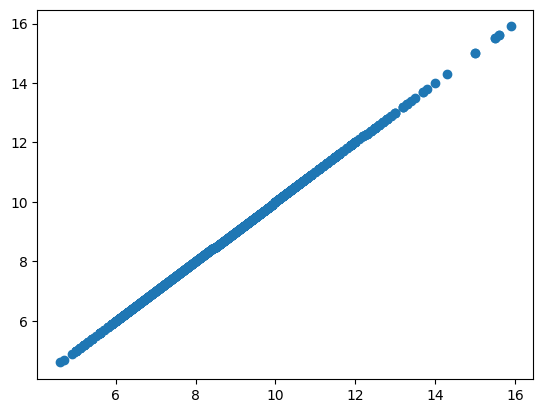

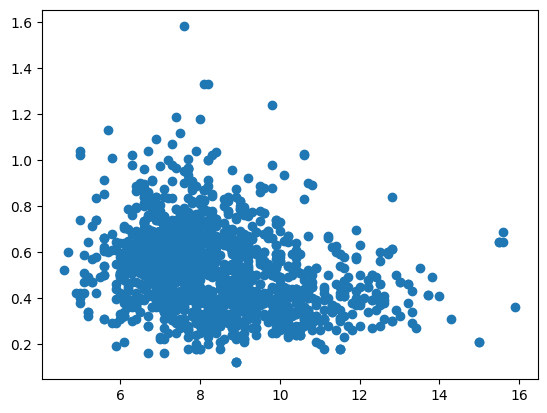

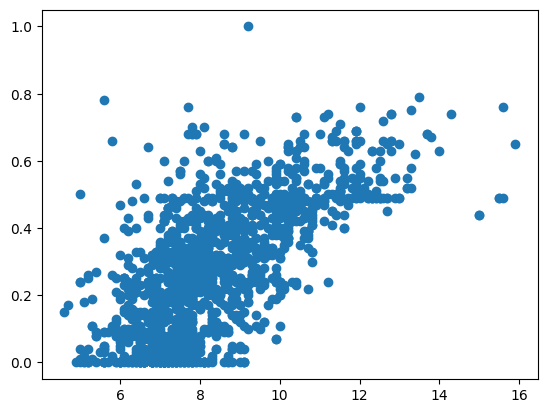

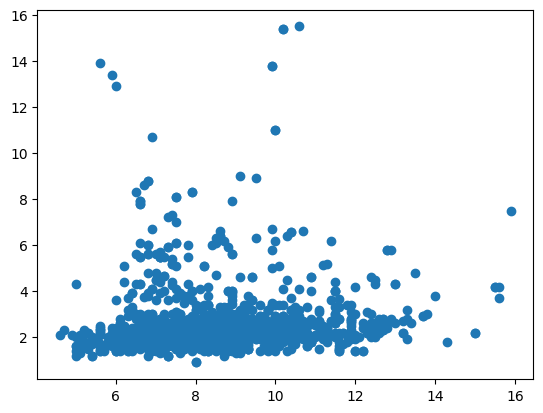

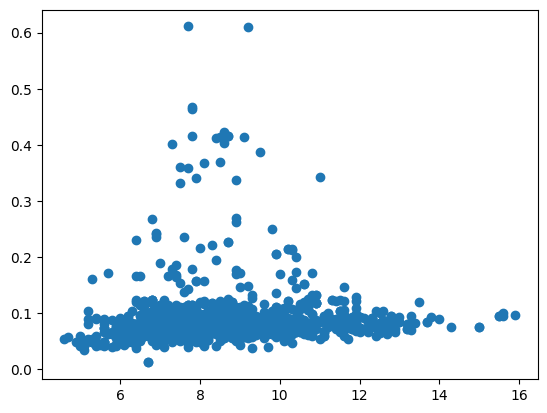

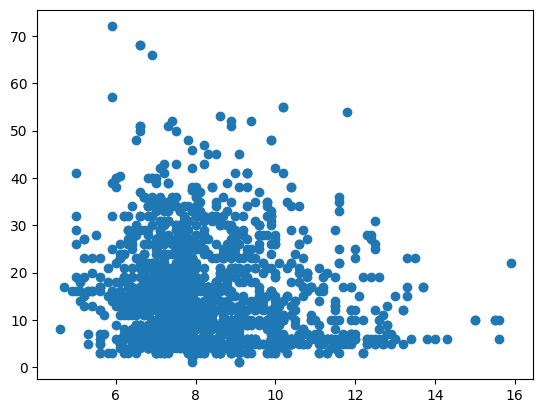

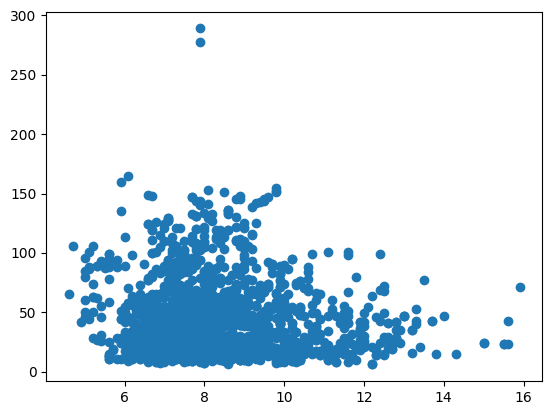

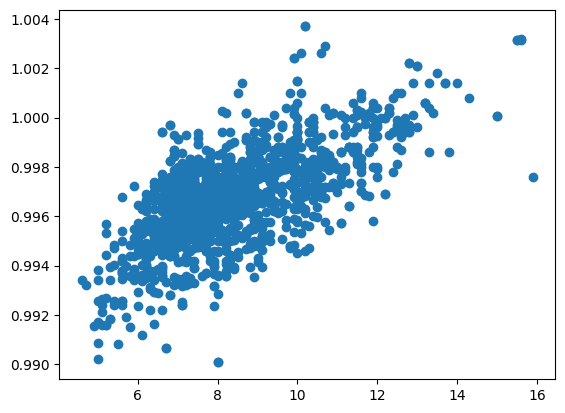

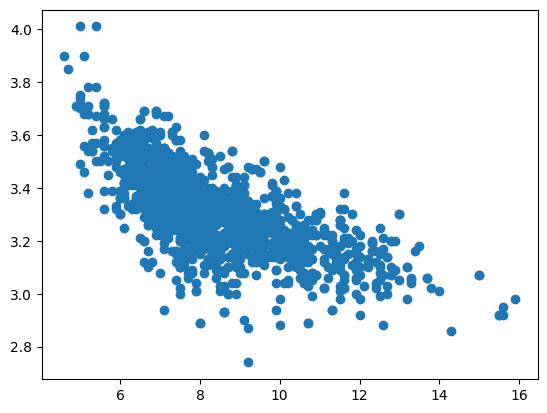

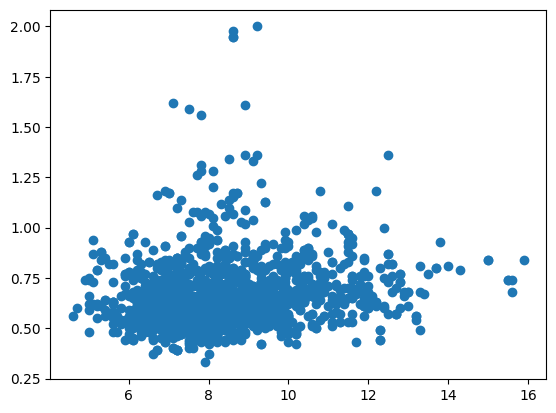

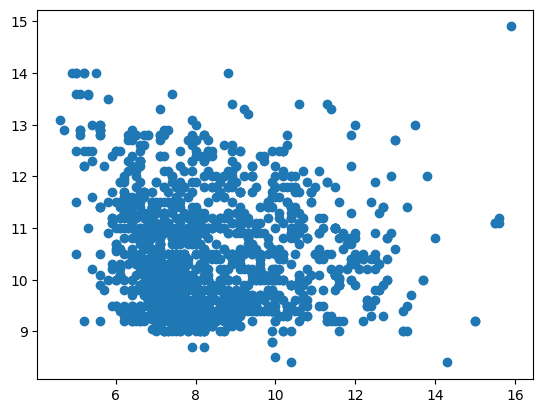

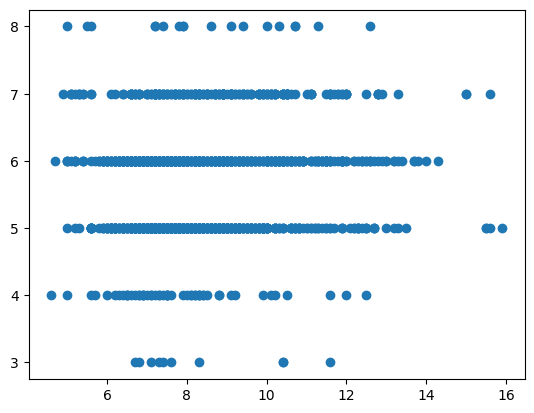

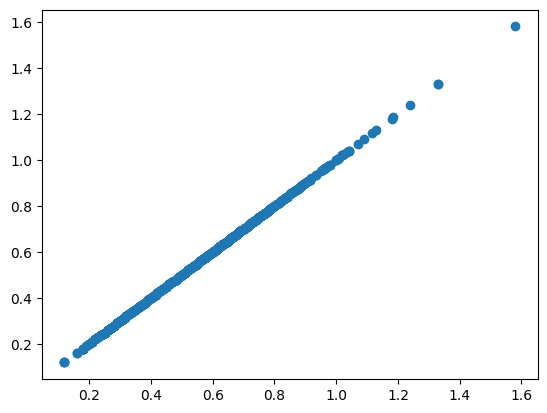

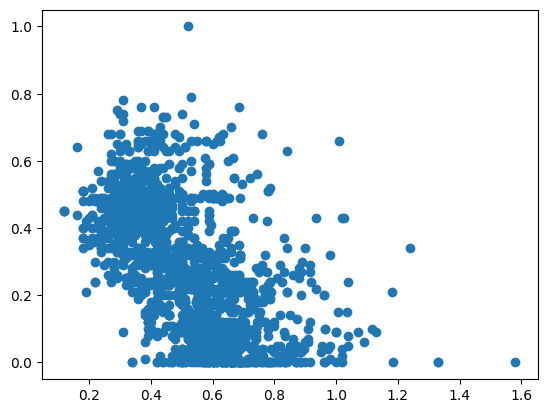

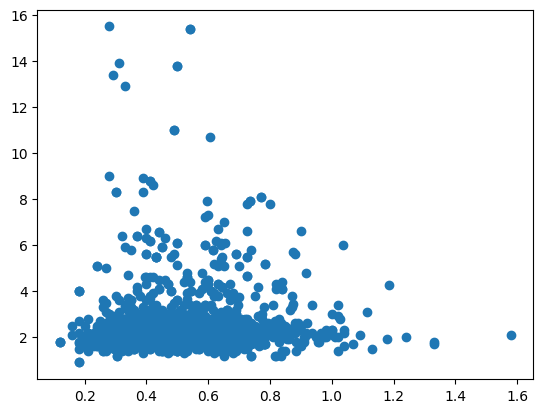

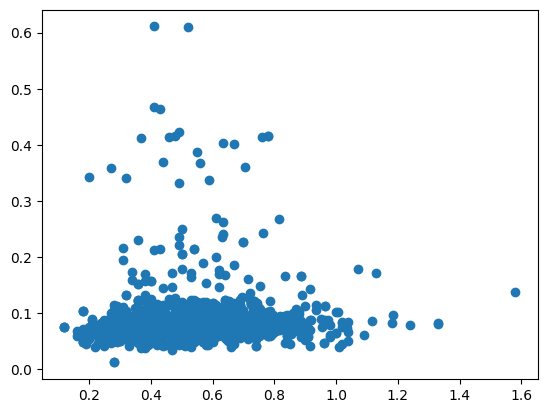

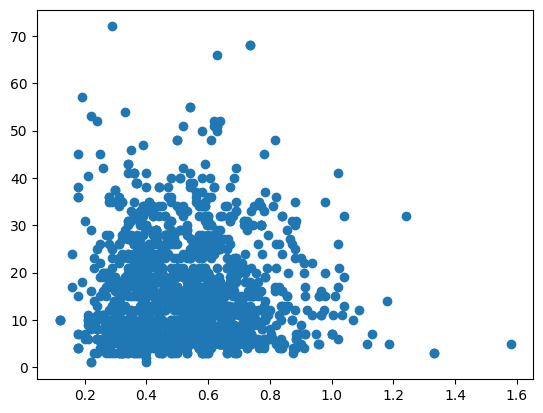

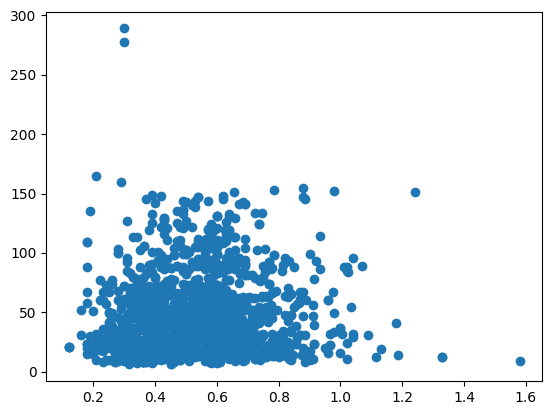

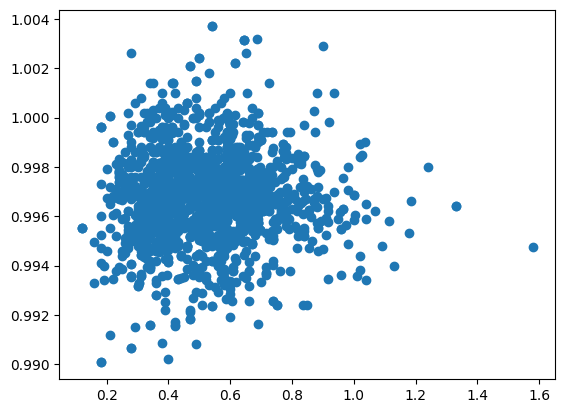

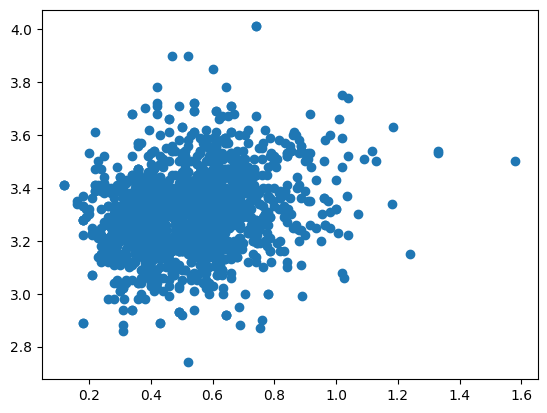

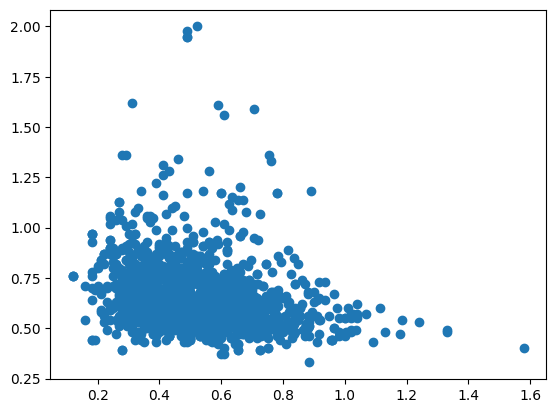

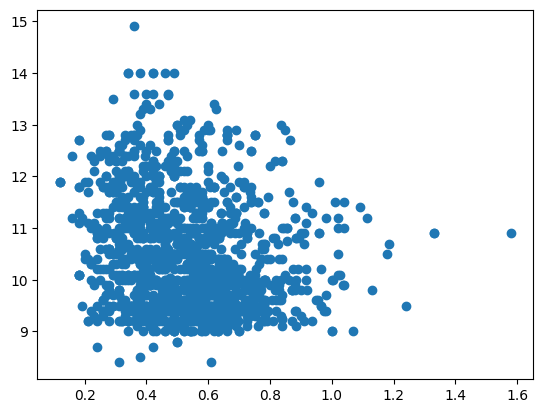

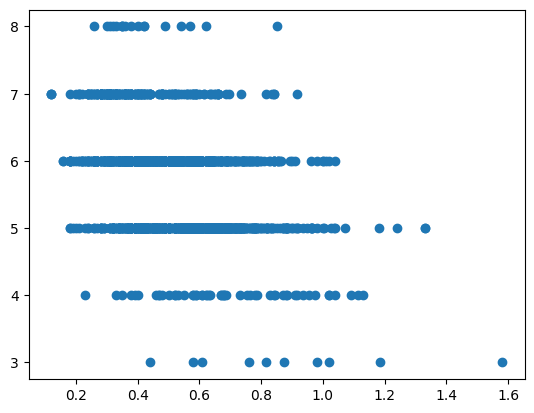

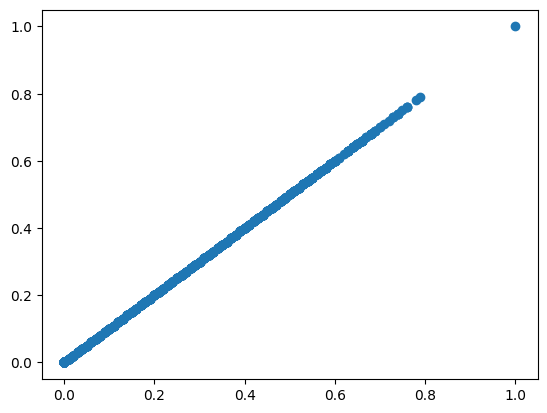

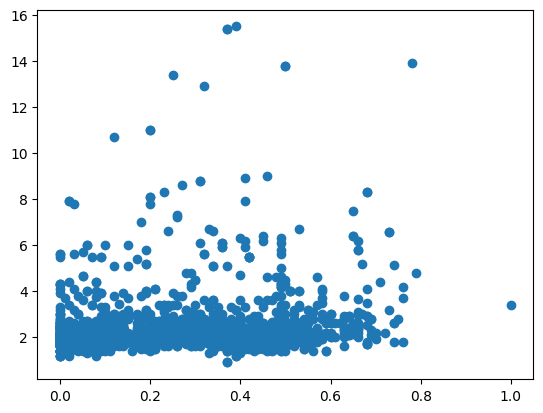

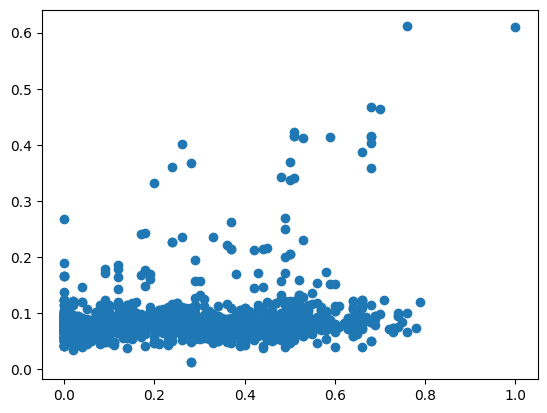

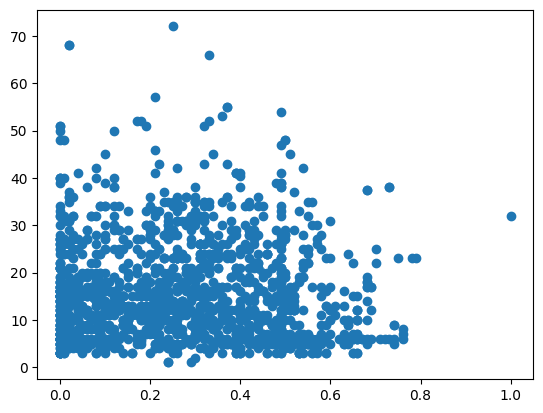

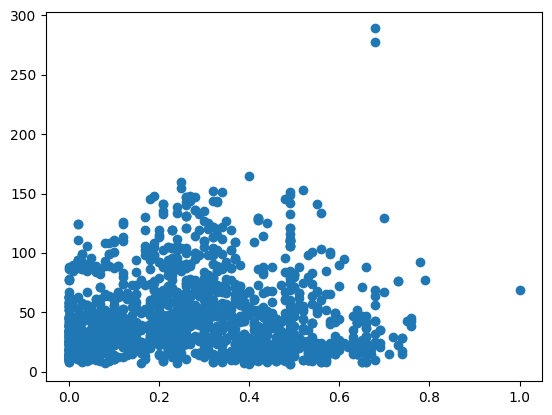

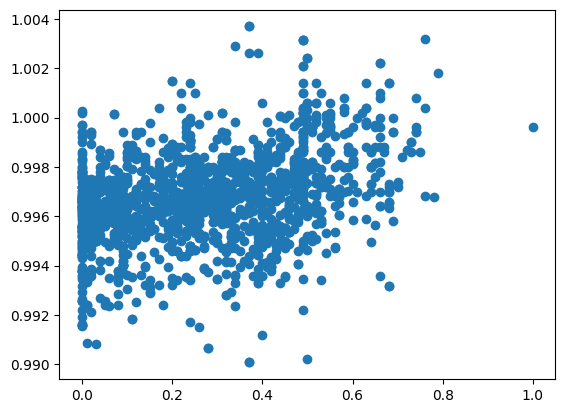

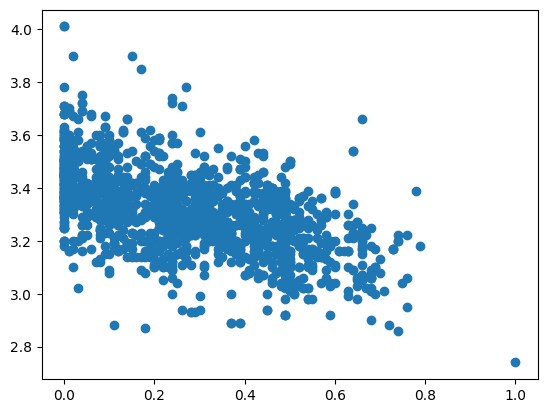

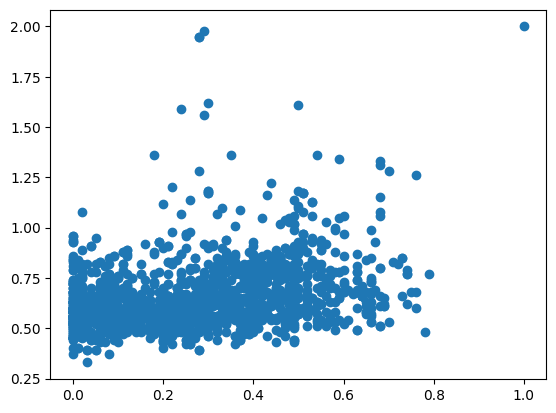

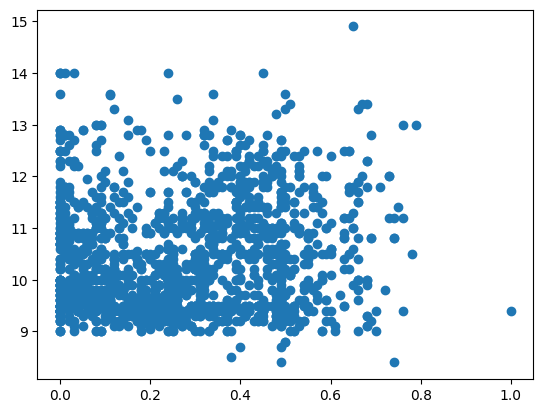

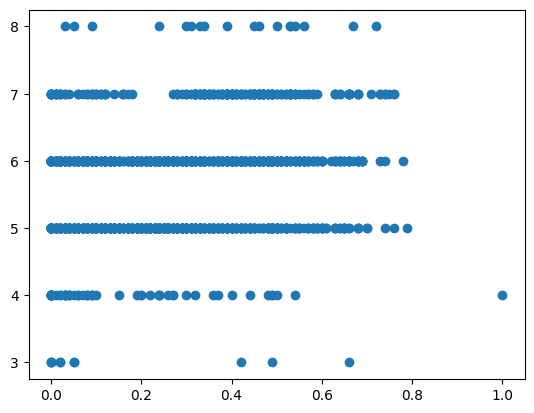

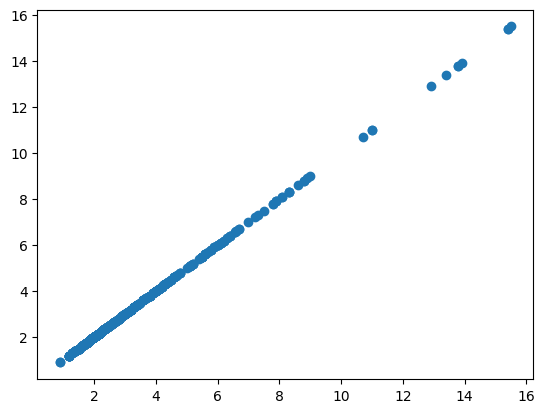

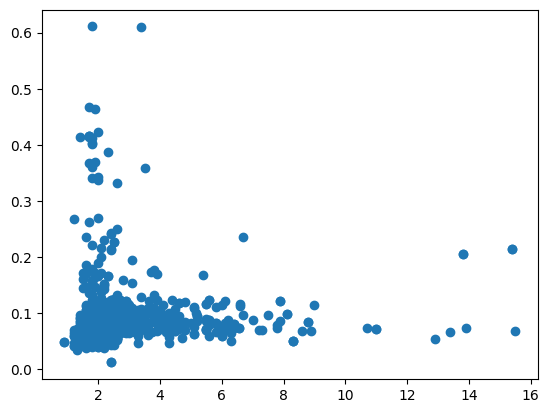

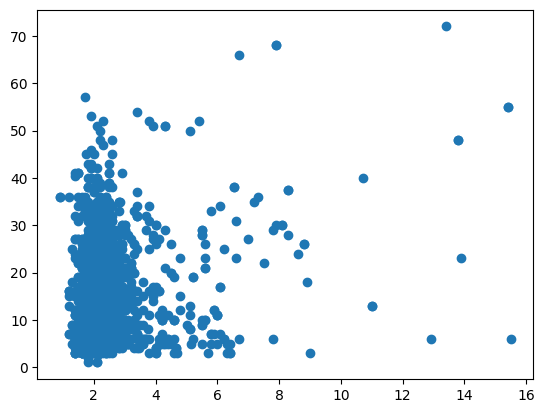

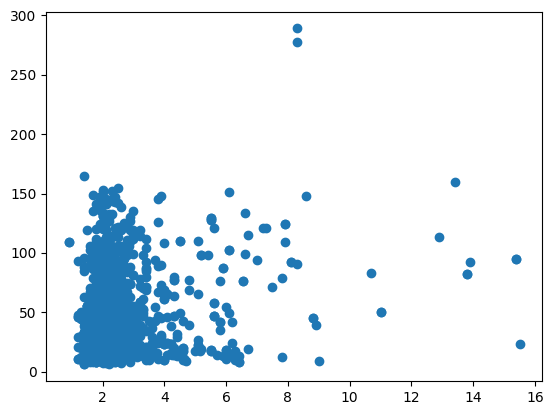

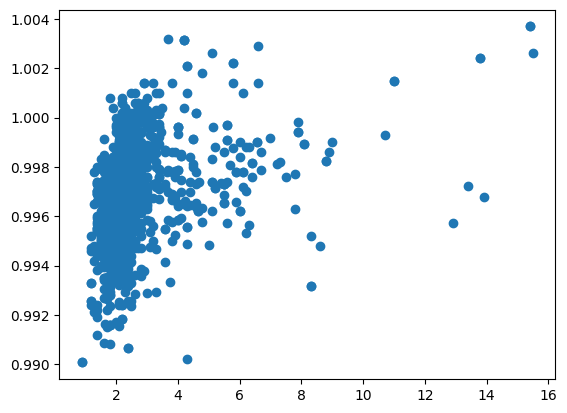

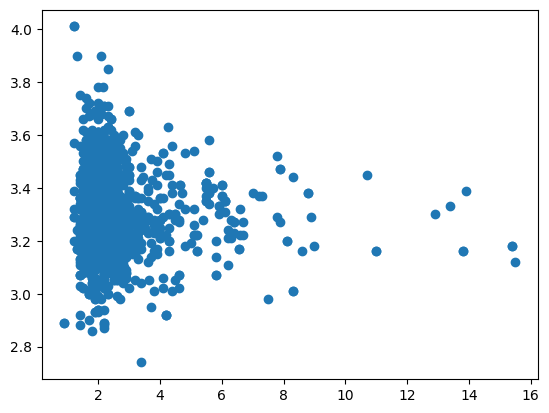

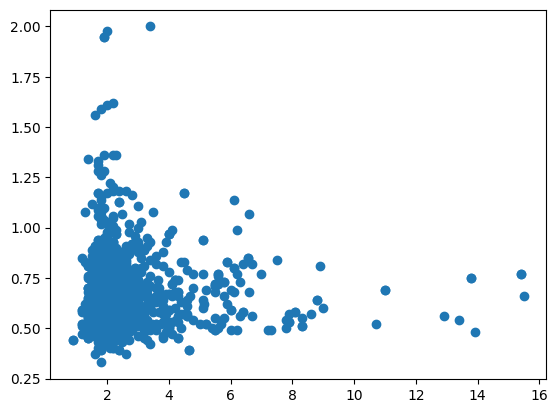

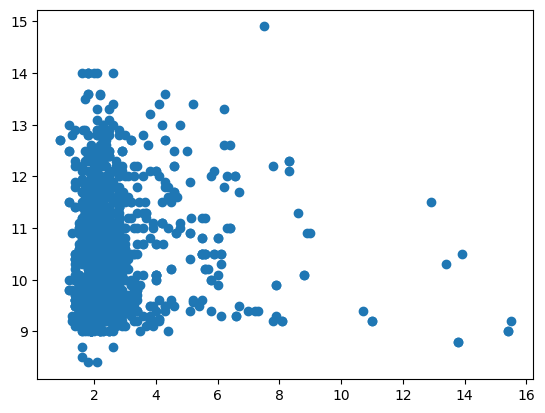

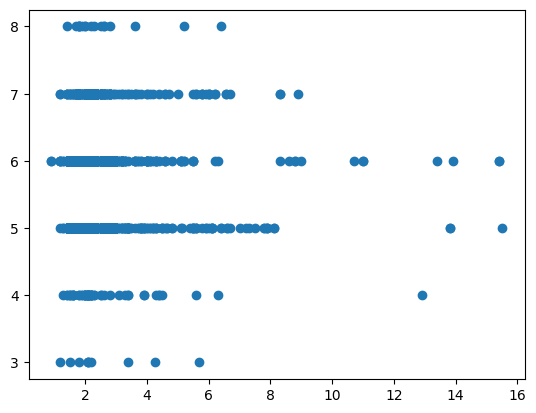

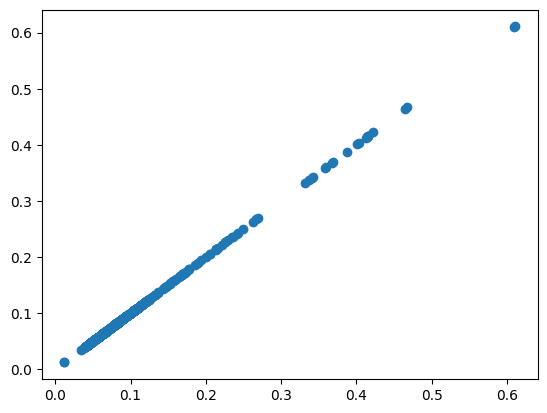

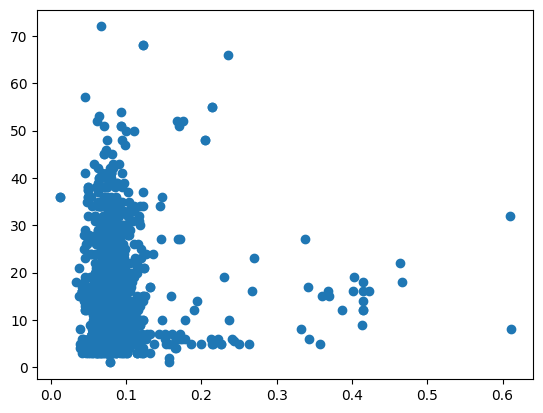

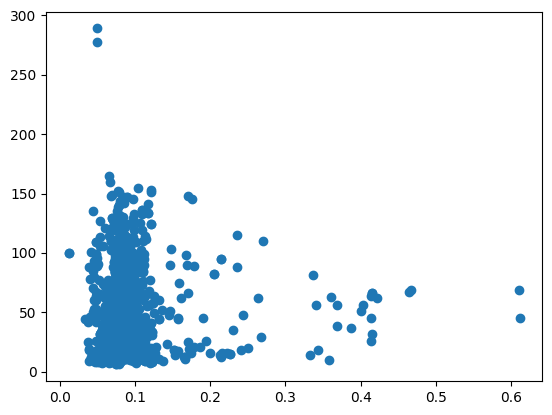

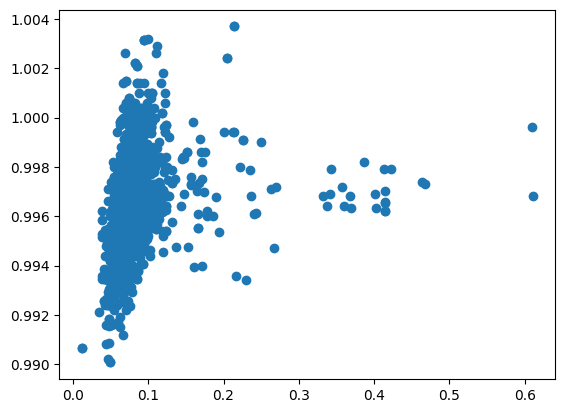

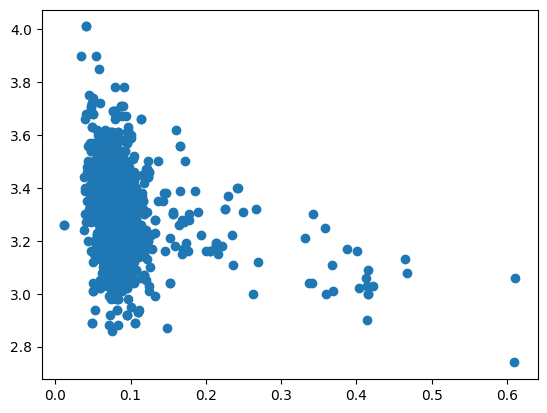

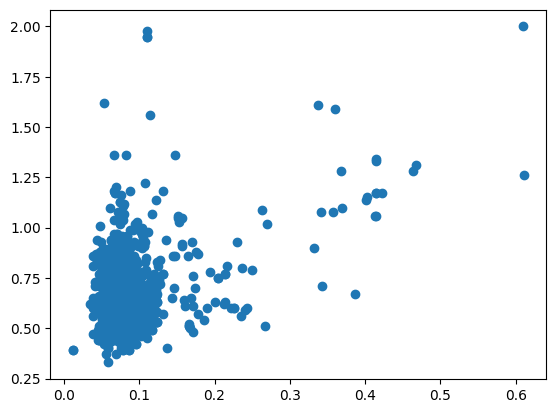

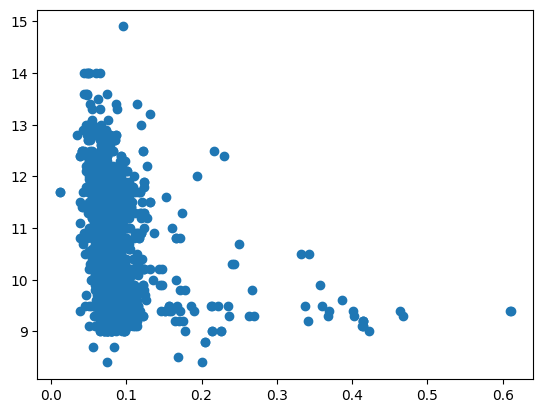

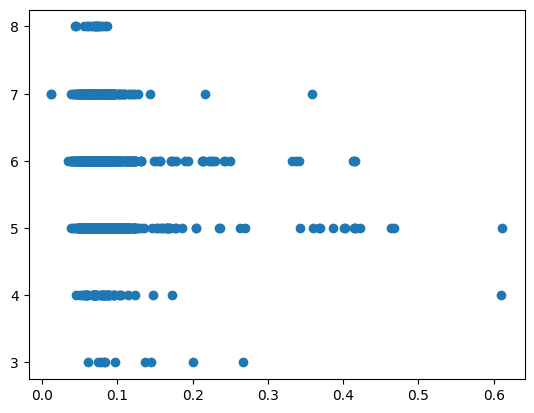

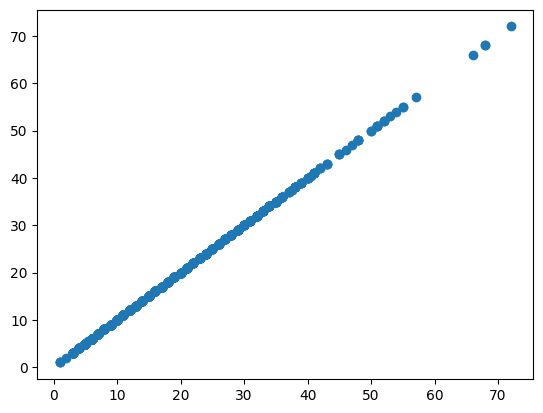

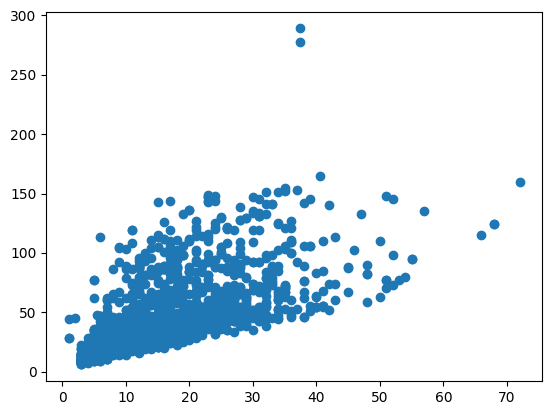

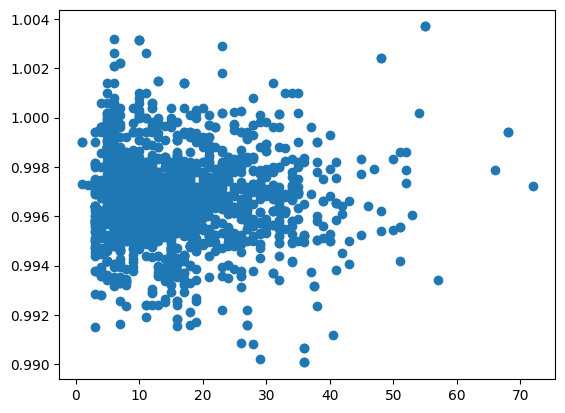

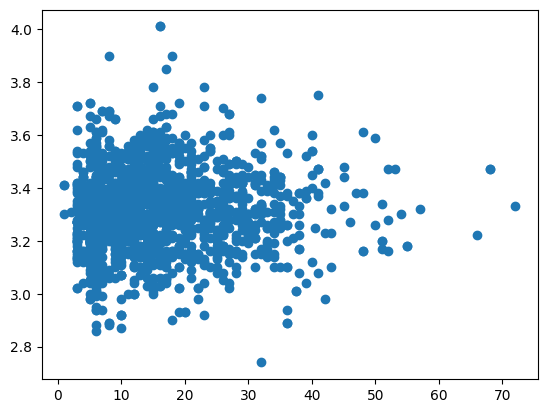

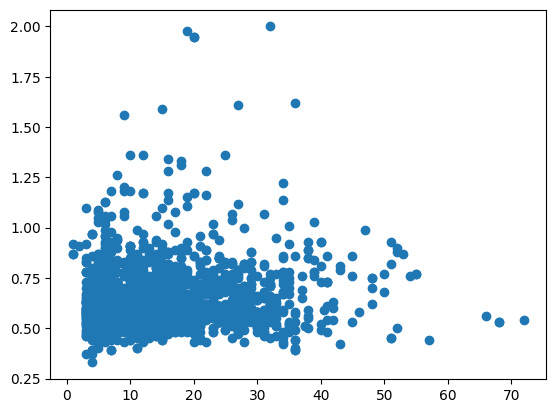

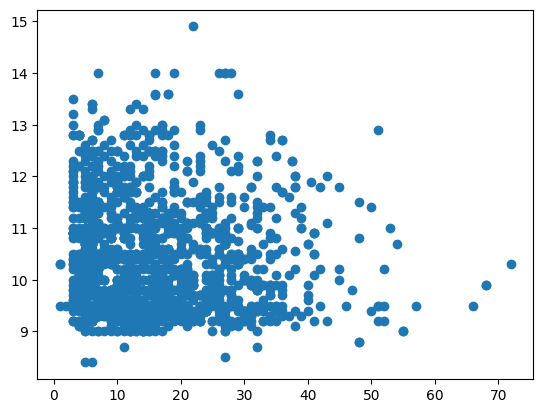

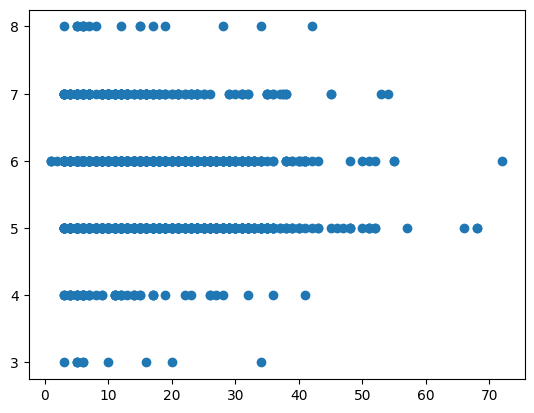

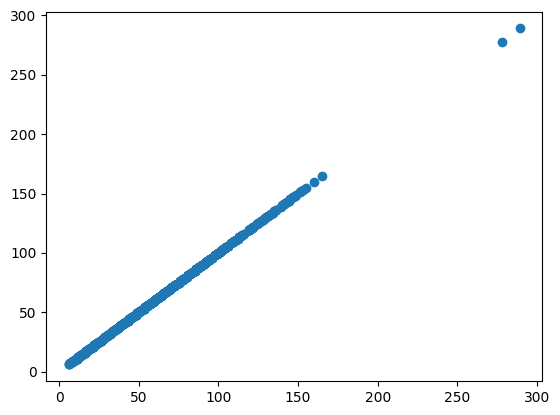

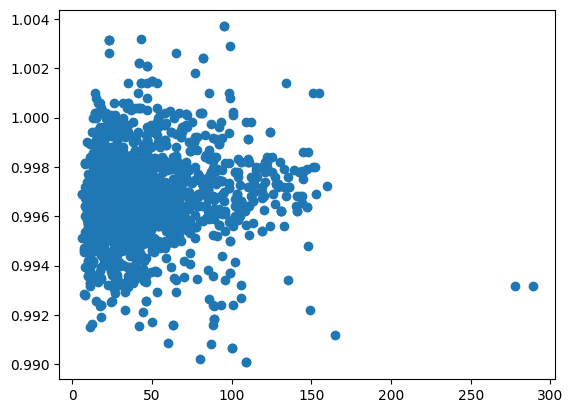

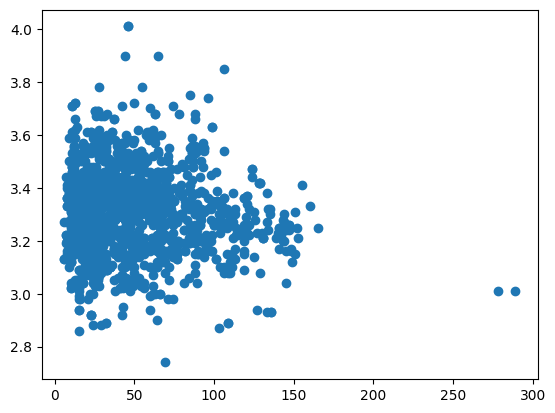

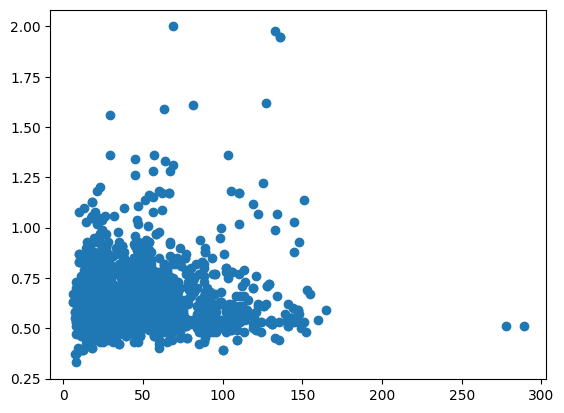

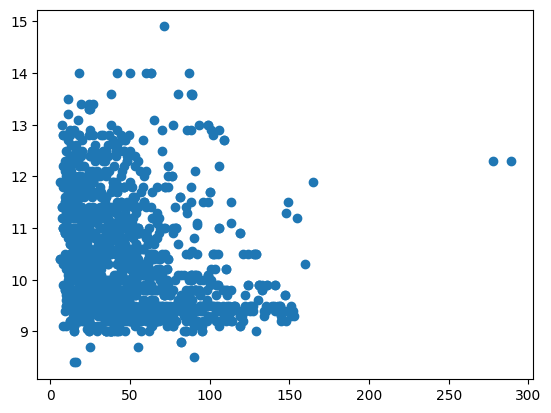

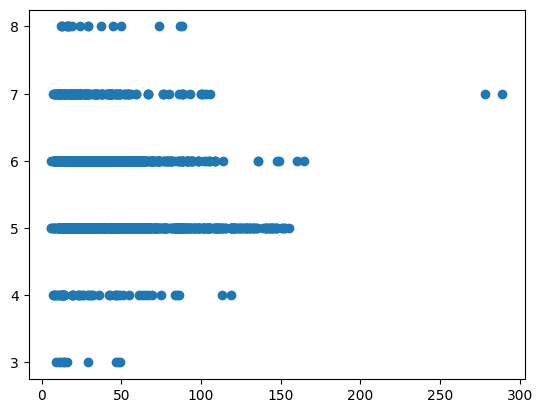

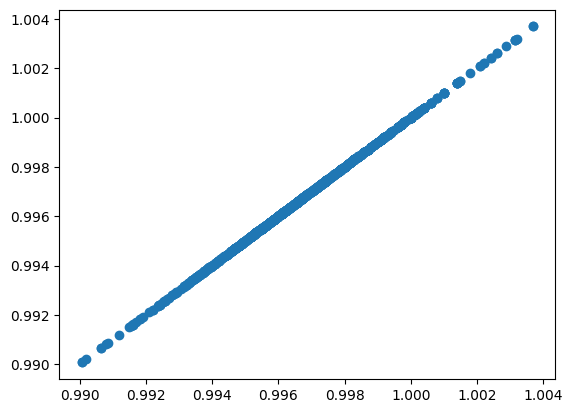

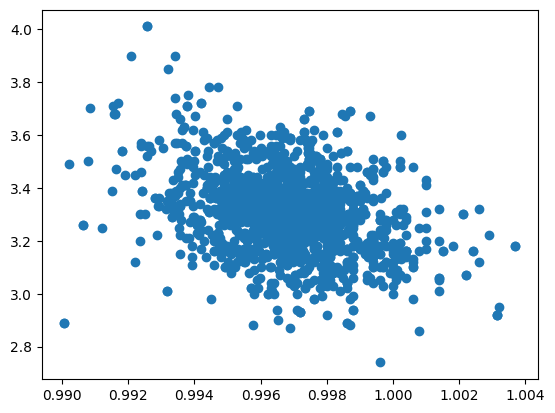

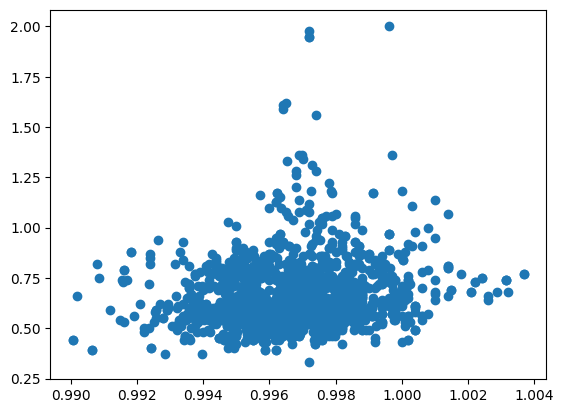

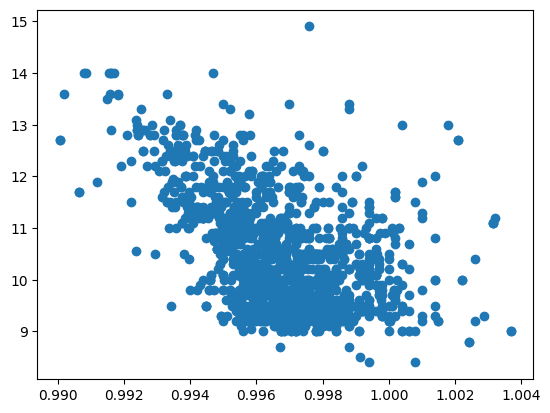

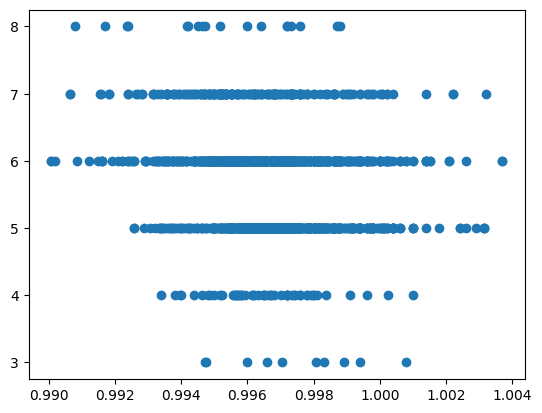

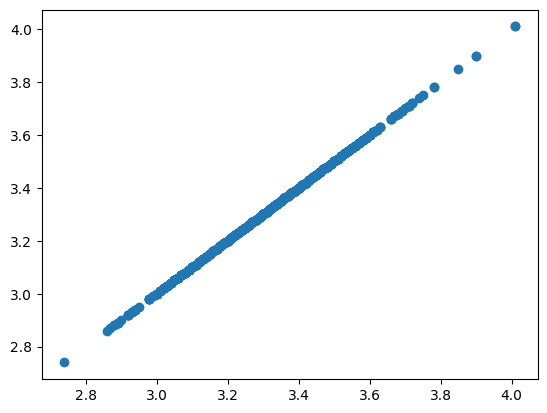

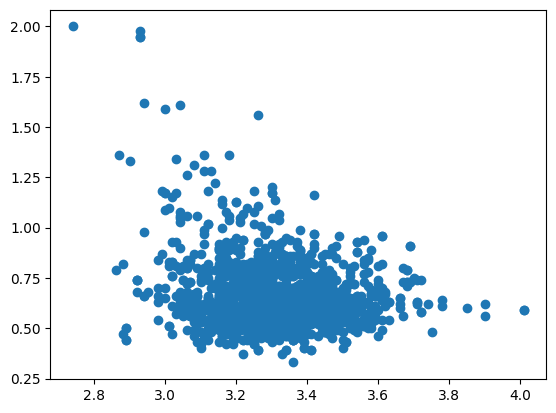

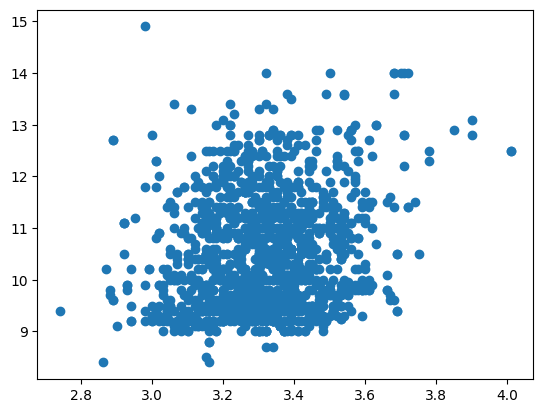

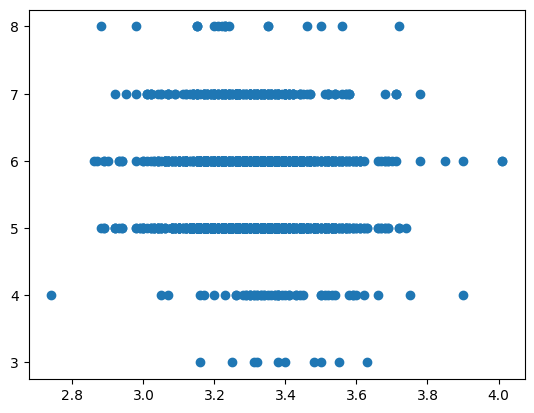

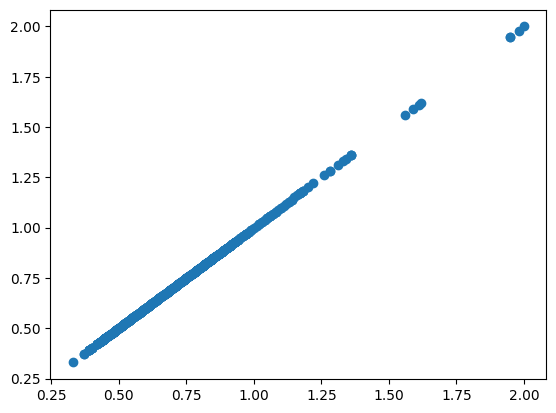

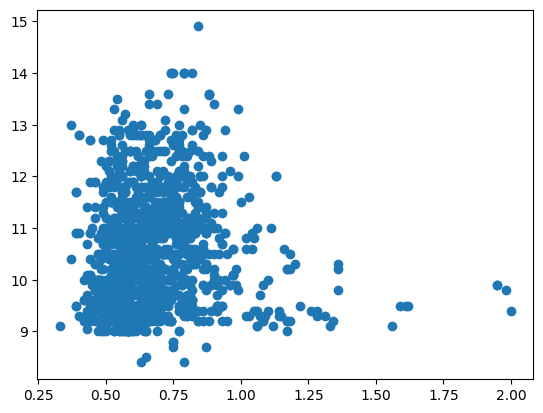

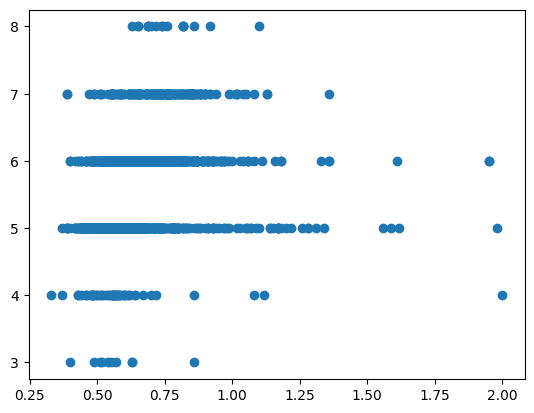

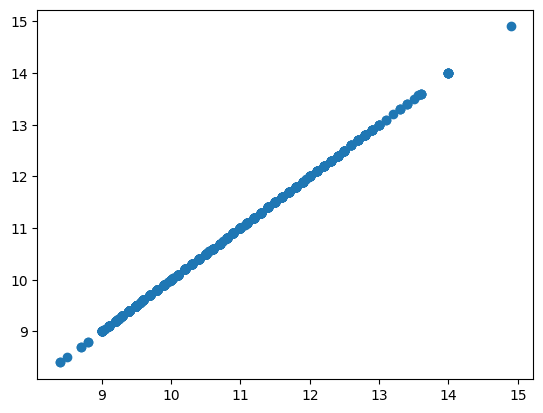

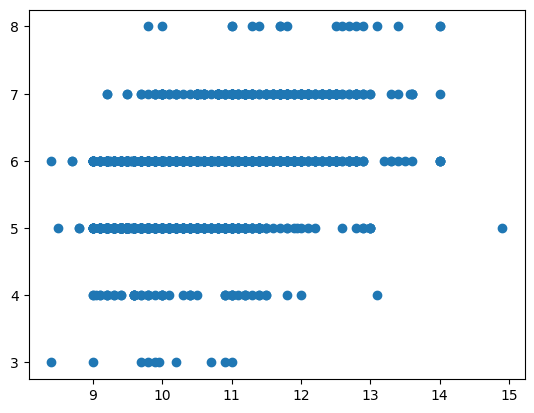

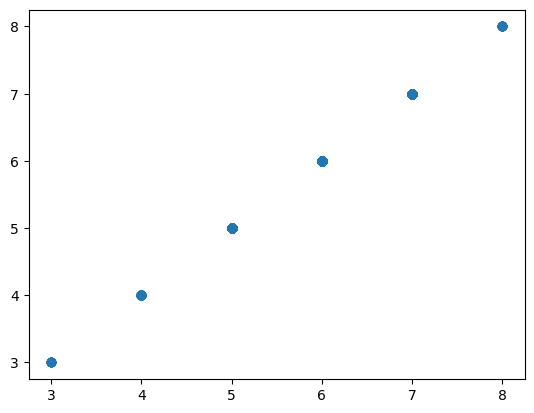

In [81]:
visited = set()
for col1 in df.columns:
  for col2 in df.columns:
    if (col1, col2) in visited or (col2, col1) in visited: continue
    plt.scatter(df[[col1]], df[[col2]])
    plt.show()
    visited.add((col1, col2))

In [82]:
df.dropna(inplace=True)
df.interpolate(method='linear', inplace=True)

In [83]:
from sklearn.model_selection import train_test_split
cols = list(df.columns).copy()
cols.remove('quality')
print(cols)
X = df[cols]
Y = df[['quality']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
(1199, 11)
(1199, 1)
(400, 11)
(400, 1)


In [84]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train, Y_train)
Y_pred = model1.predict(X_test)

In [85]:
from sklearn.metrics import r2_score, mean_squared_error
print(f'mse = {mean_squared_error(Y_test, Y_pred)}')
print(f'r2 score = {r2_score(Y_test, Y_pred)}')

mse = 0.38830173868689244
r2 score = 0.37228312008181064


In [86]:
import numpy as np

class MyMultiLinearRegression:
  def __init__(self):
    self.weights = None

  def fit(self, X, Y):
    X = np.array(X)
    Y = np.array(Y)
    #pad a column of ones to the left of X, so it gets multiplies with wo
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    #create weights; weights = (XT.X)-1 . XT . y
    self.weights = np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)

  def predict(self, X):
    X = np.array(X)
    #pad a column of ones to the left of X, so it gets multiplies with wo
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    #dot product of x and w
    return X_b.dot(self.weights)

In [87]:
model2 = MyMultiLinearRegression()
model2.fit(X_train, Y_train)
Y_pred = model2.predict(X_test)

In [88]:
print(f'mse = {mean_squared_error(Y_test, Y_pred)}')
print(f'r2 score = {r2_score(Y_test, Y_pred)}')

mse = 0.38830173867433965
r2 score = 0.3722831201021032


# **Applying dimensionality reduction using PCA and checking**

Finding the optimal value of n_components using the elbow method

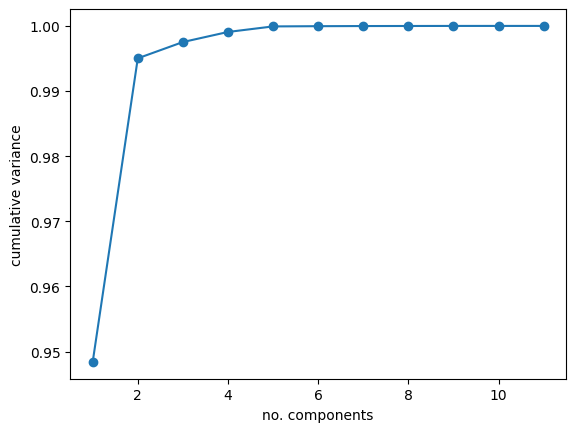

In [89]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)

cumulative_variance = pca.explained_variance_ratio_.cumsum()
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.xlabel("no. components")
plt.ylabel("cumulative variance")
plt.show()

In [90]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

In [91]:
model1_pca = LinearRegression()
model1_pca.fit(X_train_pca, Y_train)
Y_pred_pca = model1_pca.predict(X_test_pca)
print(f'mse = {mean_squared_error(Y_test, Y_pred_pca)}')
print(f'r2 score = {r2_score(Y_test, Y_pred_pca)}')

mse = 0.6156073196172713
r2 score = 0.004827773288573756


In [92]:
model2_pca = LinearRegression()
model2_pca.fit(X_train_pca, Y_train)
Y_pred_pca = model2_pca.predict(X_test_pca)
print(f'mse = {mean_squared_error(Y_test, Y_pred_pca)}')
print(f'r2 score = {r2_score(Y_test, Y_pred_pca)}')

mse = 0.6156073196172713
r2 score = 0.004827773288573756
